In [49]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder



In [50]:
df = pd.read_csv("cleaned_f1_data_New.csv")

In [51]:
df.head()

,Season,Round,Race Name,Date,Circuit,Country,Latitude,Longitude,Driver,Driver Nationality,...,Constructor,Constructor Nationality,Grid Position,Race Position,Points Earned,Fastest Lap (s),Fastest Lap Rank,Total Pit Stops,Race Laps Completed,Retirement Status
0,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,52.0786,-1.01694,Bob Gerard,British,...,ERA,British,13,6,0.0,93.053598,-1,-1,67,Finished
1,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,52.0786,-1.01694,Cuth Harrison,British,...,ERA,British,15,7,0.0,93.053598,-1,-1,67,Finished
2,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,52.0786,-1.01694,David Hampshire,British,...,Maserati,Italian,16,9,0.0,93.053598,-1,-1,64,Finished
3,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,52.0786,-1.01694,Brian Shawe Taylor,British,...,Maserati,Italian,20,10,0.0,93.053598,-1,-1,64,Finished
4,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,52.0786,-1.01694,Joe Fry,British,...,Maserati,Italian,20,10,0.0,93.053598,-1,-1,64,Finished


Categorical Values

In [52]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['Race Name', 'Date', 'Circuit', 'Country', 'Driver',
       'Driver Nationality', 'Constructor', 'Constructor Nationality',
       'Retirement Status'],
      dtype='object')


Numerical values

In [53]:

numeric_columns = df.select_dtypes(include=['number']).columns
print("Numeric Columns:", numeric_columns)

Numeric Columns: Index(['Season', 'Round', 'Latitude', 'Longitude', 'Driver Age',
       'Driver Experience (Years)', 'Driver Championship Points',
       'Driver Fastest Lap Time', 'Driver Fastest Lap Rank', 'Grid Position',
       'Race Position', 'Points Earned', 'Fastest Lap (s)', 'Fastest Lap Rank',
       'Total Pit Stops', 'Race Laps Completed'],
      dtype='object')


Dropping features which dont contribute to the Target variable

In [54]:
to_drop = ['Driver Championship Points','Latitude', 'Longitude','Driver Experience (Years)', 'Driver Fastest Lap Time', 'Driver Fastest Lap Rank', 'Points Earned', 'Fastest Lap (s)', 'Fastest Lap Rank', 'Total Pit Stops']
df = df.drop(columns=to_drop, errors='ignore')
df.columns

Index(['Season', 'Round', 'Race Name', 'Date', 'Circuit', 'Country', 'Driver',
       'Driver Nationality', 'Driver Age', 'Constructor',
       'Constructor Nationality', 'Grid Position', 'Race Position',
       'Race Laps Completed', 'Retirement Status'],
      dtype='object')

In [55]:
df.head()

,Season,Round,Race Name,Date,Circuit,Country,Driver,Driver Nationality,Driver Age,Constructor,Constructor Nationality,Grid Position,Race Position,Race Laps Completed,Retirement Status
0,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,Bob Gerard,British,36,ERA,British,13,6,67,Finished
1,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,Cuth Harrison,British,44,ERA,British,15,7,67,Finished
2,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,David Hampshire,British,33,Maserati,Italian,16,9,64,Finished
3,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,Brian Shawe Taylor,British,35,Maserati,Italian,20,10,64,Finished
4,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,Joe Fry,British,35,Maserati,Italian,20,10,64,Finished


Using Binning and Discretization to convert numerical data into categorical data.

In [56]:
# Converting the 'Season' column from numerical to categorical data
bins = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2024]
labels = ["1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s", "2020s"]
df['Season'] = pd.cut(df['Season'], bins=bins, labels=labels, right=False)



In [57]:
# Converting the 'Driver Age' column from numerical to categorical data
bins = [18, 24, 29, 34, 39, 44]
labels = ['19-24', '25-29', '30-34', '35-39', '40-44']
df['Driver Age'] = pd.cut(df['Driver Age'], bins=bins, labels=labels, right=True)


In [58]:
# Converting the 'Grid Position' column from numerical to categorical data
bins = [-1, 10, 20, 30, 33]  # Bins covering the full range
labels = ['Front Row (0-10)', 'Midfield (11-20)', 'Back Row (21-30)', 'Last Row (31-33)']
df['Grid Position'] = pd.cut(df['Grid Position'], bins=bins, labels=labels, right=True)

In [59]:
# Converting the 'Race Position' column from numerical to categorical data
bins = [2, 10, 20, 30, 37]  # Bins covering the full range
labels = ['Top 10', 'Midfield (11-20)', 'Backmarkers (21-30)', 'Last Positions (31-37)']
df['Race Position'] = pd.cut(df['Race Position'], bins=bins, labels=labels, right=True)


In [60]:
# Converting the 'Race Laps Completed' column from numerical to categorical data
bins = [-1, 25, 50, 75, 100, 142]  # Defining bin edges
labels = ['Very Short (0-25)', 'Short (26-50)', 'Medium (51-75)', 'Long (76-100)', 'Very Long (101-142)']
df['Race Laps Completed'] = pd.cut(df['Race Laps Completed'], bins=bins, labels=labels, right=True)



In [61]:
df.head()

,Season,Round,Race Name,Date,Circuit,Country,Driver,Driver Nationality,Driver Age,Constructor,Constructor Nationality,Grid Position,Race Position,Race Laps Completed,Retirement Status
0,1950s,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,Bob Gerard,British,35-39,ERA,British,Midfield (11-20),Top 10,Medium (51-75),Finished
1,1950s,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,Cuth Harrison,British,40-44,ERA,British,Midfield (11-20),Top 10,Medium (51-75),Finished
2,1950s,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,David Hampshire,British,30-34,Maserati,Italian,Midfield (11-20),Top 10,Medium (51-75),Finished
3,1950s,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,Brian Shawe Taylor,British,35-39,Maserati,Italian,Midfield (11-20),Top 10,Medium (51-75),Finished
4,1950s,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,Joe Fry,British,35-39,Maserati,Italian,Midfield (11-20),Top 10,Medium (51-75),Finished


In [62]:

df.to_csv('binned_f1_data.csv', index=False)


Association Rule Learning

In [63]:
transaction_list = df.astype(str).values.tolist()
# Apply Transaction Encoder
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [64]:
# Apply Apriori Algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)

In [65]:
# Extract Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display Rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                              antecedents  \
0                                     (2)   
1                               (Retired)   
2                               (British)   
3                                 (25-29)   
4                                 (25-29)   
..                                    ...   
61                              (Retired)   
62            (Midfield (11-20), Retired)   
63  (Very Short (0-25), Midfield (11-20))   
64                              (Retired)   
65                    (Very Short (0-25))   

                              consequents   support  confidence      lift  
0                               (Retired)  0.226493    0.843460  1.061592  
1                                     (2)  0.226493    0.285068  1.061592  
2                                 (25-29)  0.212389    0.358879  1.047381  
3                               (British)  0.212389    0.619855  1.047381  
4                      (Midfield (11-20))  0.248894    0.726392  1.011801  
.. 

In [66]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(2),(Retired),0.268529,0.794524,0.226493,0.843460,1.061592,1.0,0.013141,1.312611,0.079317,0.270744,0.238160,0.564264
1,(Retired),(2),0.794524,0.268529,0.226493,0.285068,1.061592,1.0,0.013141,1.023134,0.282360,0.270744,0.022611,0.564264
2,(British),(25-29),0.591814,0.342644,0.212389,0.358879,1.047381,1.0,0.009608,1.025322,0.110825,0.294140,0.024697,0.489367
3,(25-29),(British),0.342644,0.591814,0.212389,0.619855,1.047381,1.0,0.009608,1.073763,0.068817,0.294140,0.068696,0.489367
4,(25-29),(Midfield (11-20)),0.342644,0.717920,0.248894,0.726392,1.011801,1.0,0.002903,1.030964,0.017742,0.306644,0.030034,0.536540


In [67]:
df_encoded.head()

,1,19-24,1950-05-13,1950-05-21,1950-05-30,1950-06-04,1950s,1951-05-27,1951-05-30,1951-06-17,...,Wolfgang Seidel,Wolfgang von Trips,Yannick Dalmas,Yuki Tsunoda,Zakspeed,Zolder,Élie Bayol,Éric Bernard,Érik Comas,Óscar González
0,True,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Top 15 Rules by Support

In [68]:
rules_by_support = rules.sort_values('support', ascending=False).head(15)
rules_by_confidence = rules.sort_values('confidence', ascending=False).head(15)
rules_by_lift = rules.sort_values('lift', ascending=False).head(15)

# Display top 15 rules by support
print("Top 15 Rules by Support:")
print(rules_by_support[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
print("\n")


Top 15 Rules by Support:
                    antecedents                  consequents   support  \
30                    (Retired)           (Midfield (11-20))  0.596239   
31           (Midfield (11-20))                    (Retired)  0.596239   
17           (Midfield (11-20))                    (British)  0.439159   
16                    (British)           (Midfield (11-20))  0.439159   
33                    (Retired)          (Very Short (0-25))  0.410951   
32          (Very Short (0-25))                    (Retired)  0.410951   
46           (British, Retired)           (Midfield (11-20))  0.364491   
44  (British, Midfield (11-20))                    (Retired)  0.364491   
45  (Retired, Midfield (11-20))                    (British)  0.364491   
47           (Midfield (11-20))           (British, Retired)  0.364491   
48                    (British)  (Retired, Midfield (11-20))  0.364491   
49                    (Retired)  (British, Midfield (11-20))  0.364491   
22           

Top 15 Rules by Confidence

In [69]:
# Display top 15 rules by confidence
print("Top 15 Rules by Confidence:")
print(rules_by_confidence[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
print("\n")


Top 15 Rules by Confidence:
                              antecedents consequents   support  confidence  \
12                  (Backmarkers (21-30))   (Retired)  0.224281    1.000000   
21                             (Finished)    (Top 10)  0.205476    1.000000   
56  (Very Short (0-25), Front Row (0-10))   (Retired)  0.218473    0.996217   
50           (Very Short (0-25), British)   (Retired)  0.250830    0.993428   
32                    (Very Short (0-25))   (Retired)  0.410951    0.993316   
63  (Very Short (0-25), Midfield (11-20))   (Retired)  0.255254    0.992473   
22                     (Front Row (0-10))   (Retired)  0.345409    0.854894   
36              (25-29, Midfield (11-20))   (Retired)  0.210730    0.846667   
0                                     (2)   (Retired)  0.226493    0.843460   
40            (British, Front Row (0-10))   (Retired)  0.203816    0.843249   
20                               (Top 10)  (Finished)  0.205476    0.833895   
31                     (

Top 15 Rules by Lift

In [70]:
# Display top 15 rules by lift
print("Top 15 Rules by Lift:")
print(rules_by_lift[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Top 15 Rules by Lift:
                              antecedents  \
20                               (Top 10)   
21                             (Finished)   
58            (Front Row (0-10), Retired)   
59                    (Very Short (0-25))   
60                     (Front Row (0-10))   
57           (Very Short (0-25), Retired)   
25                     (Front Row (0-10))   
24                    (Very Short (0-25))   
53                    (Very Short (0-25))   
52                     (British, Retired)   
12                  (Backmarkers (21-30))   
13                              (Retired)   
61                              (Retired)   
56  (Very Short (0-25), Front Row (0-10))   
50           (Very Short (0-25), British)   

                              consequents   support  confidence      lift  
20                             (Finished)  0.205476    0.833895  4.058361  
21                               (Top 10)  0.205476    1.000000  4.058361  
58                    (Very S

Visualization

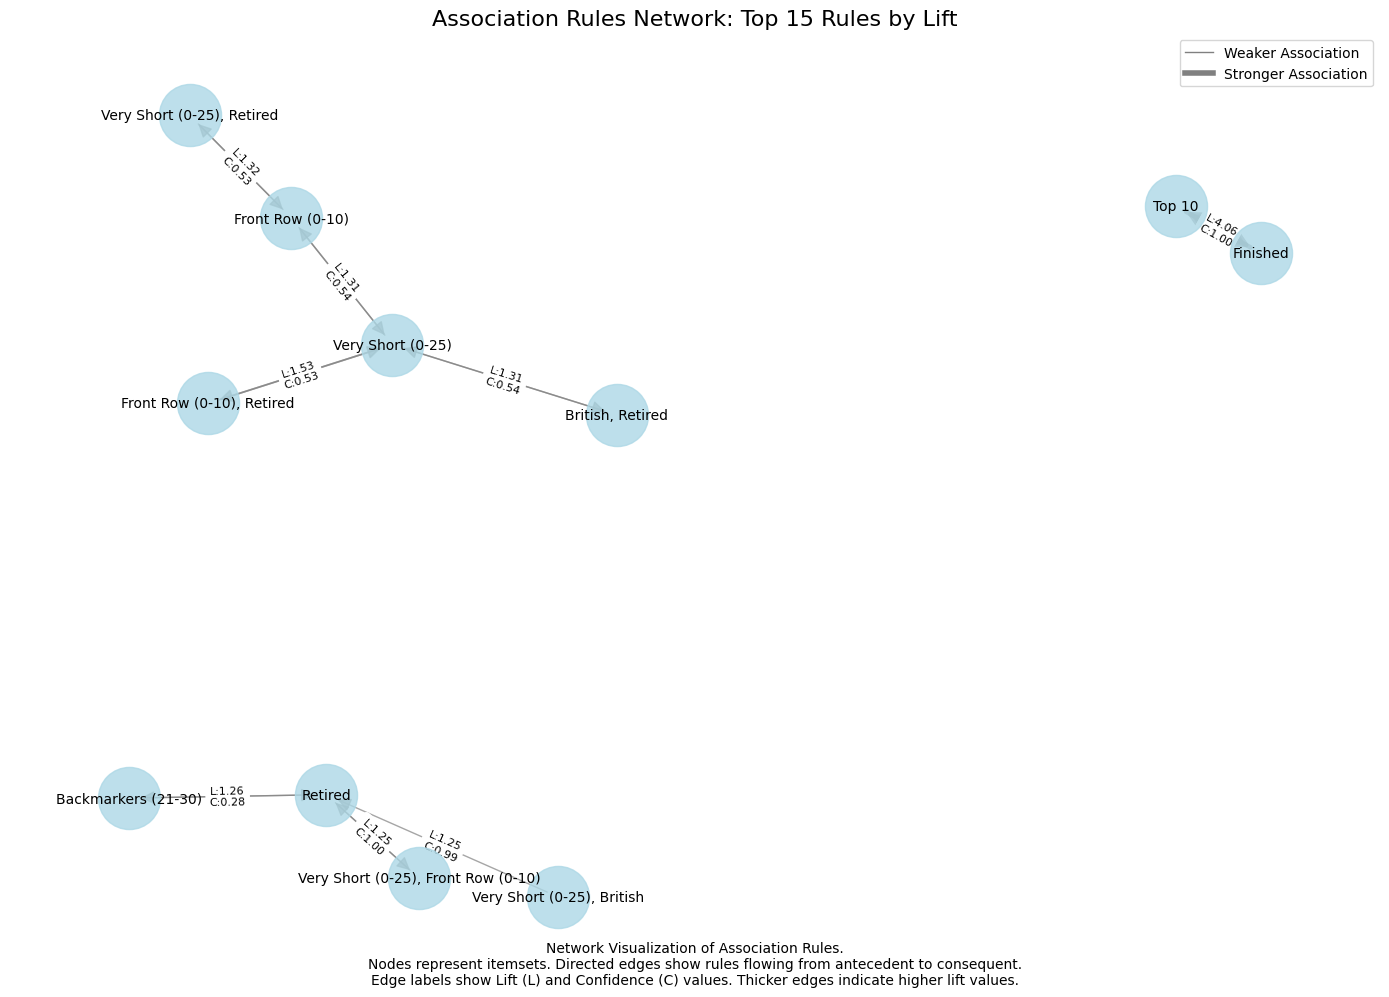

In [71]:
top_rules = rules.sort_values('lift', ascending=False).head(15)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges with attributes
for i, row in top_rules.iterrows():
    # Convert frozensets to strings for node labels
    antecedent = ', '.join(list(row['antecedents']))
    consequent = ', '.join(list(row['consequents']))

    # Add nodes if they don't exist
    if not G.has_node(antecedent):
        G.add_node(antecedent)
    if not G.has_node(consequent):
        G.add_node(consequent)

    # Add edge with attributes
    G.add_edge(
        antecedent,
        consequent,
        weight=row['lift'],  # Use lift as edge weight
        support=row['support'],
        confidence=row['confidence']
    )

# Create figure
plt.figure(figsize=(14, 10))

# Set up the layout
pos = nx.spring_layout(G, k=0.6, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue', alpha=0.8)

# Draw edges with width based on lift value
edges = G.edges(data=True)
weights = [data['weight'] * 0.8 for _, _, data in edges]  # Normalize for better visualization
nx.draw_networkx_edges(G, pos, width=weights, edge_color='gray', arrowsize=20, alpha=0.7)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# Create edge labels showing lift values
edge_labels = {(u, v): f"L:{data['weight']:.2f}\nC:{data['confidence']:.2f}"
               for u, v, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Add a title and legend
plt.title('Association Rules Network: Top 15 Rules by Lift', fontsize=16)

# Create custom legend
legend_elements = [
    Line2D([0], [0], color='gray', lw=1, label='Weaker Association'),
    Line2D([0], [0], color='gray', lw=4, label='Stronger Association')
]
plt.legend(handles=legend_elements, loc='upper right')

# Remove axes
plt.axis('off')

# Add annotation explaining the network
plt.figtext(0.5, 0.01,
            "Network Visualization of Association Rules.\nNodes represent itemsets. " +
            "Directed edges show rules flowing from antecedent to consequent.\n" +
            "Edge labels show Lift (L) and Confidence (C) values. Thicker edges indicate higher lift values.",
            ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('association_rules_network.png', dpi=300, bbox_inches='tight')
plt.show()

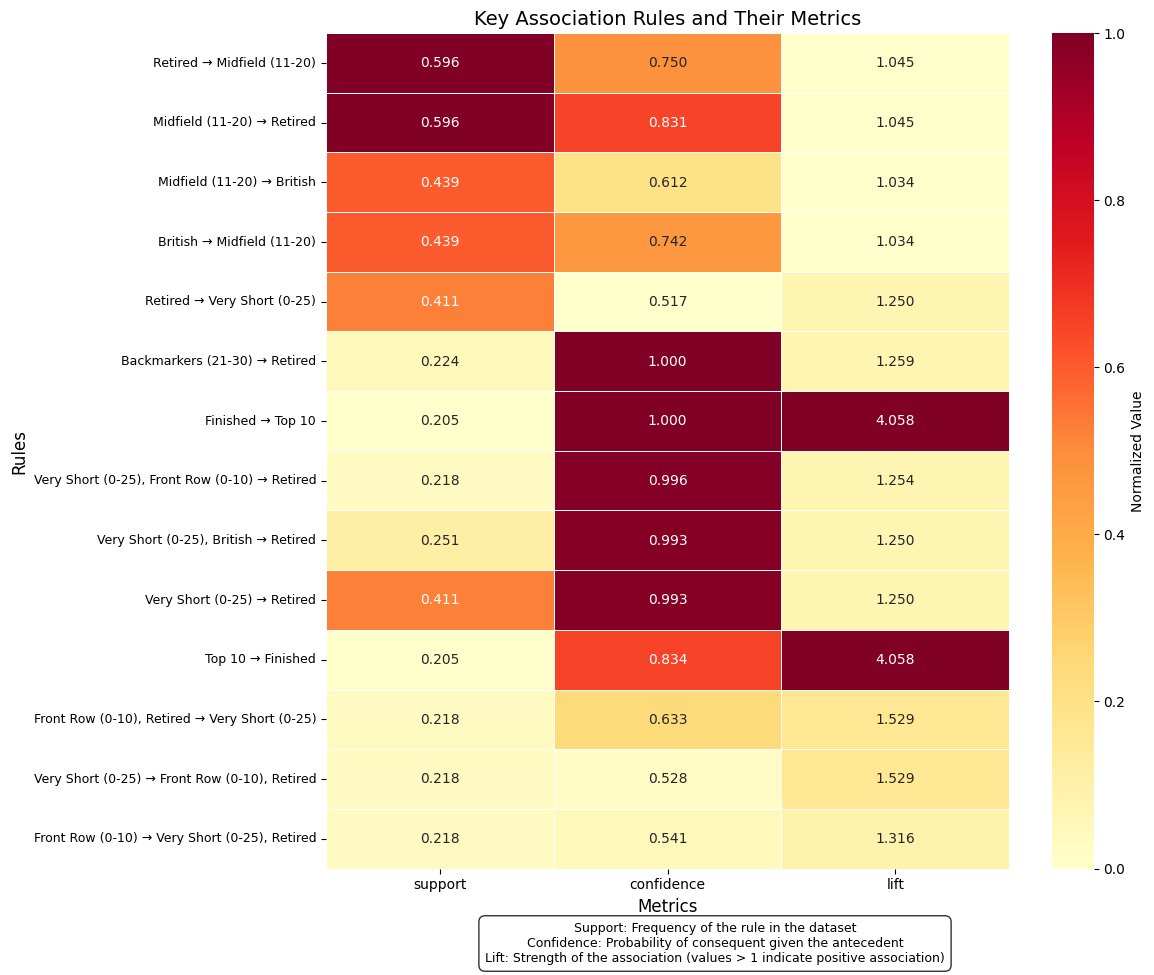

In [72]:
top_support = rules.sort_values('support', ascending=False).head(5)
top_confidence = rules.sort_values('confidence', ascending=False).head(5)
top_lift = rules.sort_values('lift', ascending=False).head(5)

# Combine and remove duplicates
combined_rules = pd.concat([top_support, top_confidence, top_lift]).drop_duplicates().reset_index(drop=True)

# Create labels for the rules
rule_labels = []
for i, row in combined_rules.iterrows():
    antecedent = ', '.join(list(row['antecedents']))
    consequent = ', '.join(list(row['consequents']))
    rule_labels.append(f"{antecedent} → {consequent}")

# Prepare data for heatmap
metrics = ['support', 'confidence', 'lift']
heatmap_data = combined_rules[metrics].values

# Normalize each metric to 0-1 scale for better visualization
normalized_data = np.zeros_like(heatmap_data, dtype=float)
for i, metric in enumerate(metrics):
    min_val = combined_rules[metric].min()
    max_val = combined_rules[metric].max()
    normalized_data[:, i] = (combined_rules[metric] - min_val) / (max_val - min_val)

# Create figure with appropriate dimensions
plt.figure(figsize=(12, len(combined_rules) * 0.6 + 2))

# Create heatmap
ax = sns.heatmap(
    normalized_data,
    annot=np.round(heatmap_data, 3),  # Show original values in annotations
    fmt='.3f',
    cmap='YlOrRd',  # Yellow-Orange-Red colormap is good for emphasizing higher values
    xticklabels=metrics,
    yticklabels=rule_labels,
    linewidths=0.5,
    cbar_kws={'label': 'Normalized Value'}
)

# Customize plot appearance
plt.title('Key Association Rules and Their Metrics', fontsize=14)
plt.ylabel('Rules', fontsize=12)
plt.xlabel('Metrics', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=9)

# Add explanation of metrics
plt.figtext(
    0.6, 0.02,
    "Support: Frequency of the rule in the dataset\n"
    "Confidence: Probability of consequent given the antecedent\n"
    "Lift: Strength of the association (values > 1 indicate positive association)",
    ha='center',
    fontsize=9,
    bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5')
)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig('key_association_rules_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()